In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, join, unique
from utils import *
from astroquery.gaia import Gaia
from astropy.coordinates import SkyCoord
import astropy.units as u
import pandas as pd
from tqdm import tqdm
from IPython.utils import io

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


In [3]:
hosts = Table.read('kepler_host_matches.fits').to_pandas()

/Users/mbedell/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: TableReplaceWarning: converted column 'teff_err1' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/mbedell/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: TableReplaceWarning: converted column 'teff_err2' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
pairs = Table(names=('kepid1', 'gaia_id1', 'gaia_id2', 'gmag1', 
                    'gmag2', 'gaia_ra1', 'gaia_ra2', 'gaia_dec1', 'gaia_dec2', 'parallax1', 'parallax2', 
                    'pmra1', 'pmra2', 'pmdec1', 'pmdec2', 'chisq'), 
             dtype=('int64', 'int64', 'int64', 'float64', 
                    'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64',
                    'float64', 'float64', 'float64', 'float64', 'float64'))
all_matches = pd.DataFrame()

In [5]:
for i,h in tqdm(hosts.iterrows()):
    coord = SkyCoord(ra=h['ra_2'], dec=h['dec_2'], unit=(u.degree, u.degree))
    radius = u.Quantity(1.0, u.arcmin)
    with io.capture_output() as captured: # suppress print
        query = Gaia.cone_search_async(coord, radius)
    matches = query.get_results().to_pandas()
    match_chisqs = matches.apply(calc_chisq_for_pair, args=(h,), axis=1).values
    for j,c in enumerate(match_chisqs):
        if (h.loc['source_id'] != matches.iloc[j].loc['source_id']) & (c != -1) & (c < 25):
            m = matches.iloc[j]
            pairs.add_row([h['kepid'], h['source_id'], m['source_id'], h['phot_g_mean_mag'], 
                          m['phot_g_mean_mag'], h['ra_2'], m['ra'], h['dec_2'], m['dec'],
                          h['parallax'], m['parallax'], 
                          h['pmra'], m['pmra'], h['pmdec'], m['pmdec'], c])
            all_matches = all_matches.append(m)
    if (i % 100) == 0:
        print("total number of matches: {0}".format(len(pairs)))

0it [00:00, ?it/s]/Users/mbedell/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: TableReplaceWarning: converted column 'priam_flags' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/mbedell/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: TableReplaceWarning: converted column 'flame_flags' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
1it [00:02,  2.58s/it]

total number of matches: 0


101it [03:19,  1.98s/it]

total number of matches: 16


201it [06:29,  2.02s/it]

total number of matches: 35


301it [09:50,  2.18s/it]

total number of matches: 45


401it [13:11,  2.35s/it]

total number of matches: 60


501it [16:21,  1.86s/it]

total number of matches: 68


601it [19:22,  1.74s/it]

total number of matches: 85


701it [22:14,  1.59s/it]

total number of matches: 104


801it [25:18,  1.68s/it]

total number of matches: 118


901it [28:14,  1.61s/it]

total number of matches: 132


1001it [31:06,  1.73s/it]

total number of matches: 150


1101it [34:02,  1.77s/it]

total number of matches: 161


1201it [37:00,  1.83s/it]

total number of matches: 179


1301it [39:53,  1.74s/it]

total number of matches: 197


1401it [42:43,  1.79s/it]

total number of matches: 214


1471it [44:46,  1.75s/it]


7.137453556060791


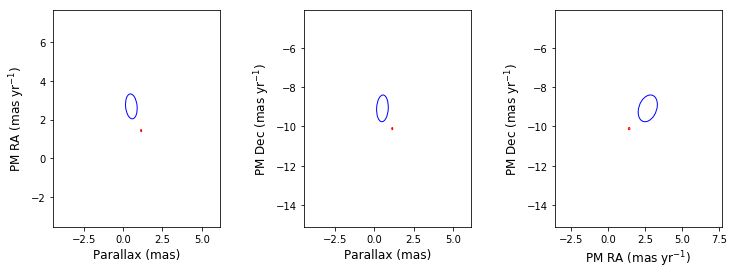

In [18]:
i = 70
p, m = pairs[i]['gaia_id1'], pairs[i]['gaia_id2']
plot_xs(hosts[hosts['source_id'] == p], all_matches[all_matches['source_id'] == m])
print(pairs[i]['chisq'])

In [9]:
pairs

kepid1,gaia_id1,gaia_id2,gmag1,gmag2,gaia_ra1,gaia_ra2,gaia_dec1,gaia_dec2,parallax1,parallax2,pmra1,pmra2,pmdec1,pmdec2,chisq
int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2165352,2051826553004393216,2051826346837873280,14.466073036193848,20.745059967041016,292.5432036297524,292.5537209355359,37.55573356585061,37.551424209042004,2.153488806403055,2.0620478599602112,11.145580314283087,9.382697996451109,-3.912891837984659,-0.4974593682115181,5.2628493309021
2167890,2051656094340873856,2051656090041303808,13.057876586914062,19.696697235107422,293.09356988321395,293.09136045896884,37.51452339621538,37.50755638167224,0.436353899262792,1.1773142443596187,0.965279141923846,0.98004313850679,0.9763176871645559,3.66064648381104,15.29715633392334
2167890,2051656094340873856,2051656197424862592,13.057876586914062,20.238018035888672,293.09356988321395,293.10942468187534,37.51452339621538,37.52540856260206,0.436353899262792,-1.2191267477848693,0.965279141923846,-1.1904074984235422,0.9763176871645559,4.677047251456124,18.873815536499023
2437804,2051105342096702080,2051105342091735552,14.124670028686523,20.540983200073242,290.25359643514395,290.2545055326072,37.75940339212507,37.7541965900231,0.17264363771467106,0.34716643754909166,-0.5316803896173524,5.372565984889833,-2.2694053579658786,-4.021104881934549,11.811958312988281
2440757,2052588995598461056,2052588991295811584,15.083730697631836,19.07396697998047,290.84369755042,290.8369123569596,37.72882349598036,37.730570486062255,0.5862318905210258,0.4031601071197613,3.6515884404118903,1.7283543710739742,-0.25190551569092223,-0.7831690083752423,21.55157470703125
2570773,2051295317088301440,2051295626325472640,16.84463119506836,19.643957138061523,290.3307169388226,290.3466174877441,37.882073845484065,37.87572941902957,1.0974569331503026,0.43743231058827076,0.9949516229568145,2.1117818047737837,-1.3490145410481387,-3.4813092946780735,18.004180908203125
2708156,2051296416599937536,2051296622753443200,10.256492614746094,19.721675872802734,290.287117738709,290.2714199476967,37.936484191549084,37.9438935808084,1.0891789139891408,1.0401105742852939,0.541434205923323,2.6000596517607546,-7.852060158985858,-6.33619214298438,13.743480682373047
2860594,2052236048062761984,2052238629337704704,13.293911933898926,20.218456268310547,293.1649598864787,293.14848386236037,38.069111240804894,38.065168706721124,0.349499192300304,0.09699382994294863,-0.3084965168748135,4.005949224790383,-2.363096741511715,-4.063954443707619,23.40471649169922
2997455,2052240141176935808,2052240106806488448,13.78675365447998,20.567960739135742,293.13039090306256,293.1191777336265,38.12779476511141,38.116107167543035,0.4790390074542793,0.012119686010797352,-1.426761691554269,5.531559412734896,0.9795088629746551,1.5776163301262431,23.35506248474121


In [10]:
pairs.write('kepler_pairs.fits', overwrite=True)

(array([16., 12., 17., 21., 16., 25., 23., 27., 29., 32.]),
 array([ 0.24396507,  2.71512406,  5.18628305,  7.65744204, 10.12860103,
        12.59976002, 15.07091901, 17.542078  , 20.01323698, 22.48439597,
        24.95555496]),
 <a list of 10 Patch objects>)

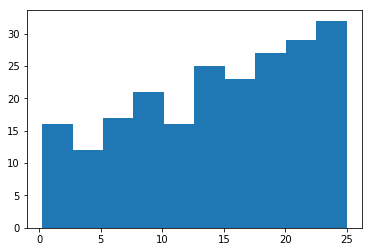

In [11]:
plt.hist(pairs['chisq'])